1> **Import necessary libraries:** The code begins by importing the necessary libraries. pandas is used for data manipulation, sklearn for machine learning tasks, matplotlib and seaborn for data visualization, and numpy for numerical operations.

2>**Load the datasets:** The code reads two CSV files containing fake and real news articles.

3>**Assign labels:** The code assigns labels to the articles: ‘1’ for fake news and ‘0’ for real news.

4>**Drop unnecessary columns:** The code drops the ‘title’, ‘subject’, and ‘date’ columns from the datasets as they are not needed for the classification task.

5>**Merge and shuffle the dataframes:** The datasets are merged into one and shuffled to ensure a good mix of fake and real news articles.

6>**Preprocess the text:** The text is preprocessed by converting it to lowercase and replacing non-word characters with spaces.

7>**Split the data into training and testing sets:** The data is split into a training set and a testing set. 80% of the data is used for training the model and the remaining 20% is used for testing the model’s performance.

8>**Vectorize the text data:** The text data is converted into numerical data using the TF-IDF vectorizer. This is necessary because machine learning models cannot work with raw text data.

9>**Train a Logistic Regression model:** A Logistic Regression model is trained on the training data. This model will learn to classify news articles as fake or real based on the features extracted from the text.

10>**Make predictions:** The trained model is used to make predictions on the testing data.

11>**Print the accuracy and classification report:** The accuracy of the model is calculated and a classification report is printed. The classification report includes precision, recall, and F1-score for each class.

12>**Compute ROC curve and ROC area for each class:** The Receiver Operating Characteristic (ROC) curve and the area under the ROC curve (AUC) are computed. These metrics provide a comprehensive view of the model’s performance across all possible classification thresholds.

13>**Plot ROC curve:** The ROC curve is plotted. The curve shows the true positive rate (sensitivity) against the false positive rate (1 - specificity) for different possible thresholds of a classifier.

14>**Compute precision, recall, F1-score and support:** The precision, recall, F1-score, and support for each class are computed. These metrics provide a detailed view of the model’s performance.

15>**Plot bar graph for precision, recall, F1-score:** A bar graph is plotted showing the precision, recall, and F1-score for each class. This graph provides a visual comparison of the model’s performance on the two classes.

16>**Function to predict if a news article is fake or not:** A function is defined that takes a news article as input, preprocesses and vectorizes the text, makes a prediction using the trained model, and then returns whether the news article is predicted to be fake or real.

17>**Test the function:** The function is tested by passing a news article to it. The function prints either “Fake” or “Real” depending on the prediction of the model.

In [1]:
#Importing Important Libraries And Function that will be used in entire project
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, precision_recall_fscore_support,precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display, HTML

In [2]:
# Load the datasets
df1 = pd.read_csv("Fake.csv")
df2 = pd.read_csv("True.csv")

In [3]:
#Determining Rows and Coloumns of Fake.csv and True.csv
print(df1.shape)
print(df2.shape)

(23481, 4)
(21417, 4)


In [4]:
# Assign labels Fake:- 1 & True :- 0
df1["response"] = 1
df2["response"] = 0

In [5]:
#Displaying Top 10 Data stored in Fake.csv File
df1.head(10)

,title,text,subject,date,response
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",1
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",1
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",1
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",1
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",1


In [6]:
#Displaying Top 10 Data stored in True.csv File
df2.head(10)

,title,text,subject,date,response
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",0
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",0
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",0
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",0
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",0


In [7]:
# Drop unnecessary columns
df1 = df1.drop(["title","subject","date"], axis=1)
df2 = df2.drop(["title","subject","date"], axis=1)

In [8]:
# Merge and shuffle the dataframes
df = pd.concat([df1, df2], ignore_index=True).sample(frac=1, random_state=42)
print(df.shape)
df.head(10)

(44898, 2)


,text,response
22216,"21st Century Wire says Ben Stein, reputable pr...",1
27917,WASHINGTON (Reuters) - U.S. President Donald T...,0
25007,(Reuters) - Puerto Rico Governor Ricardo Rosse...,0
1377,"On Monday, Donald Trump once again embarrassed...",1
32476,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",0
5766,"On Wednesday, Democrats took a powerful stance...",1
16230,President Trump s rally in FL on Saturday was ...,1
20911,He s been Europe s version of the outspoken Te...,1
35838,WASHINGTON (Reuters) - The State Department sa...,0
33155,(This version of the story corrects the figur...,0


In [9]:
# Preprocess the text by converting into lower case and replaces all non-word characters with a space.
df["text"] = df["text"].str.lower().str.replace('\W', ' ', regex=True)

In [10]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df["text"], df["response"], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [11]:
# Train a Logistic Regression model
LRM = LogisticRegression()
LRM.fit(x_train, y_train)

# Make predictions
y_pred = LRM.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision,recall,F1 Score for fake news
precision = precision_score(y_test, y_pred, average='binary', pos_label=1)
recall = recall_score(y_test, y_pred, average='binary', pos_label=1)
f1 = f1_score(y_test, y_pred, average='binary', pos_label=1)
# Calculate precision,recall,F1 Score for True news
precision1 = precision_score(y_test, y_pred, average='binary', pos_label=0)
recall1 = recall_score(y_test, y_pred, average='binary', pos_label=0)
f11 = f1_score(y_test, y_pred, average='binary', pos_label=0)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (Fake News)', 'Recall (Fake News)', 'F1 Score (Fake News)',
               'Precision (True News)', 'Recall (True News)', 'F1 Score (True News)'],
    'Value': [accuracy, precision, recall, f1, precision1, recall1, f11]
})

# Set the display options for pandas
pd.set_option('display.float_format', '{:.8f}'.format)

# Define a function to make the headings bold, underlined and left-aligned
def pretty_print(df):
    return display(HTML(df.to_html().replace('<th>', '<th style="font-weight: bold; text-decoration: underline; text-align: left;">').replace('<td>', '<td style="text-align: left;">')))

# Print the results in a tabular format
pretty_print(results_df)

,Metric,Value
0,Accuracy,0.98452116
1,Precision (Fake News),0.98783351
2,Recall (Fake News),0.98259023
3,F1 Score (Fake News),0.98520490
4,Precision (True News),0.98090803
5,Recall (True News),0.98665105
6,F1 Score (True News),0.98377116


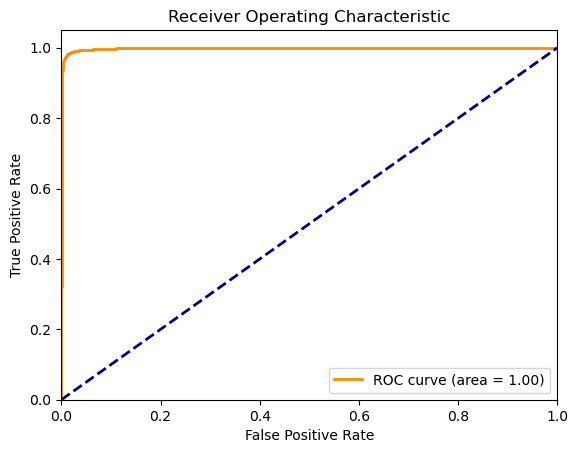

In [12]:
fpr = dict()
tpr = dict()
roc_auc = dict()

y_score = LRM.decision_function(x_test)
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [13]:
# Create and train the Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)

# Make predictions on the test set
y_pred = DTC.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision,recall,F1 Score for fake news
precision = precision_score(y_test, y_pred, average='binary', pos_label=1)
recall = recall_score(y_test, y_pred, average='binary', pos_label=1)
f1 = f1_score(y_test, y_pred, average='binary', pos_label=1)

# Calculate precision,recall,F1 Score for True news
precision1 = precision_score(y_test, y_pred, average='binary', pos_label=0)
recall1 = recall_score(y_test, y_pred, average='binary', pos_label=0)
f11 = f1_score(y_test, y_pred, average='binary', pos_label=0)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (Fake News)', 'Recall (Fake News)', 'F1 Score (Fake News)',
               'Precision (True News)', 'Recall (True News)', 'F1 Score (True News)'],
    'Value': [accuracy, precision, recall, f1, precision1, recall1, f11]
})

# Set the display options for pandas
pd.set_option('display.float_format', '{:.8f}'.format)

# Define a function to make the headings bold, underlined and left-aligned
def pretty_print(df):
    return display(HTML(df.to_html().replace('<th>', '<th style="font-weight: bold; text-decoration: underline; text-align: left;">').replace('<td>', '<td style="text-align: left;">')))

# Print the results in a tabular format
pretty_print(results_df)

,Metric,Value
0,Accuracy,0.99665924
1,Precision (Fake News),0.99534293
2,Recall (Fake News),0.99830149
3,F1 Score (Fake News),0.99682001
4,Precision (True News),0.99812030
5,Recall (True News),0.99484778
6,F1 Score (True News),0.99648135


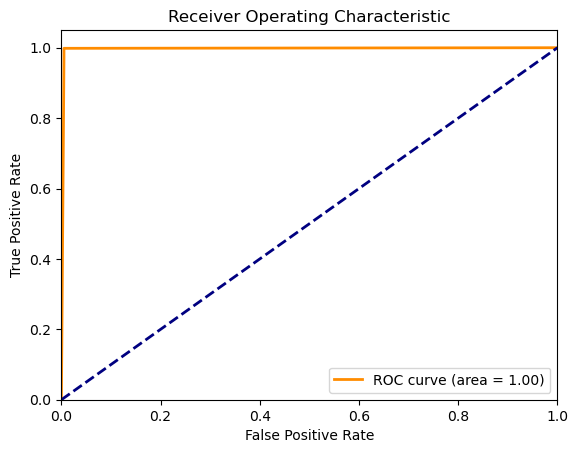

In [14]:
fpr = dict()
tpr = dict()
roc_auc = dict()

y_score = DTC.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [15]:
# Create and train the Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)

# Make predictions on the test set
y_pred = RFC.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision,recall,F1 Score for fake news
precision = precision_score(y_test, y_pred, average='binary', pos_label=1)
recall = recall_score(y_test, y_pred, average='binary', pos_label=1)
f1 = f1_score(y_test, y_pred, average='binary', pos_label=1)

# Calculate precision,recall,F1 Score for True news
precision1 = precision_score(y_test, y_pred, average='binary', pos_label=0)
recall1 = recall_score(y_test, y_pred, average='binary', pos_label=0)
f11 = f1_score(y_test, y_pred, average='binary', pos_label=0)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (Fake News)', 'Recall (Fake News)', 'F1 Score (Fake News)',
               'Precision (True News)', 'Recall (True News)', 'F1 Score (True News)'],
    'Value': [accuracy, precision, recall, f1, precision1, recall1, f11]
})

# Set the display options for pandas
pd.set_option('display.float_format', '{:.8f}'.format)

# Define a function to make the headings bold, underlined and left-aligned
def pretty_print(df):
    return display(HTML(df.to_html().replace('<th>', '<th style=\"font-weight: bold; text-decoration: underline; text-align: left;\">').replace('<td>', '<td style=\"text-align: left;\">')))

# Print the results in a tabular format
pretty_print(results_df)

,Metric,Value
0,Accuracy,0.98763920
1,Precision (Fake News),0.98811293
2,Recall (Fake News),0.98832272
3,F1 Score (Fake News),0.98821781
4,Precision (True News),0.98711642
5,Recall (True News),0.98688525
6,F1 Score (True News),0.98700082


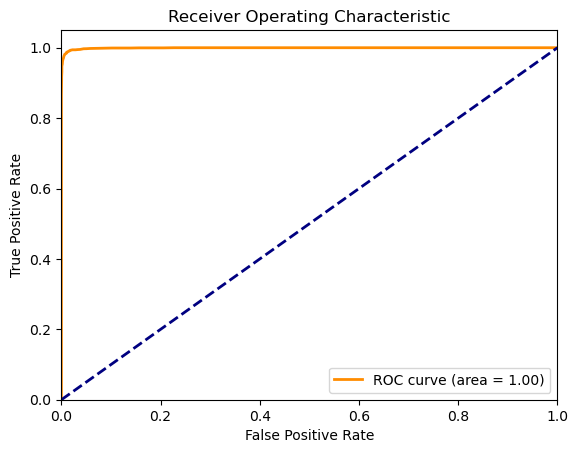

In [16]:
fpr = dict()
tpr = dict()
roc_auc = dict()

y_score = RFC.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [17]:
# Create and train the Naive Bayes classifier
NB = MultinomialNB()
NB.fit(x_train, y_train)

# Make predictions on the test set
y_pred = NB.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision,recall,F1 Score for fake news
precision = precision_score(y_test, y_pred, average='binary', pos_label=1)
recall = recall_score(y_test, y_pred, average='binary', pos_label=1)
f1 = f1_score(y_test, y_pred, average='binary', pos_label=1)

# Calculate precision,recall,F1 Score for True news
precision1 = precision_score(y_test, y_pred, average='binary', pos_label=0)
recall1 = recall_score(y_test, y_pred, average='binary', pos_label=0)
f11 = f1_score(y_test, y_pred, average='binary', pos_label=0)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (Fake News)', 'Recall (Fake News)', 'F1 Score (Fake News)',
               'Precision (True News)', 'Recall (True News)', 'F1 Score (True News)'],
    'Value': [accuracy, precision, recall, f1, precision1, recall1, f11]
})

# Set the display options for pandas
pd.set_option('display.float_format', '{:.8f}'.format)

# Define a function to make the headings bold, underlined and left-aligned
def pretty_print(df):
    return display(HTML(df.to_html().replace('<th>', '<th style=\"font-weight: bold; text-decoration: underline; text-align: left;\">').replace('<td>', '<td style=\"text-align: left;\">')))

# Print the results in a tabular format
pretty_print(results_df)


,Metric,Value
0,Accuracy,0.93541203
1,Precision (Fake News),0.93309564
2,Recall (Fake News),0.94458599
3,F1 Score (Fake News),0.93880566
4,Precision (True News),0.93803419
5,Recall (True News),0.92529274
6,F1 Score (True News),0.93161990


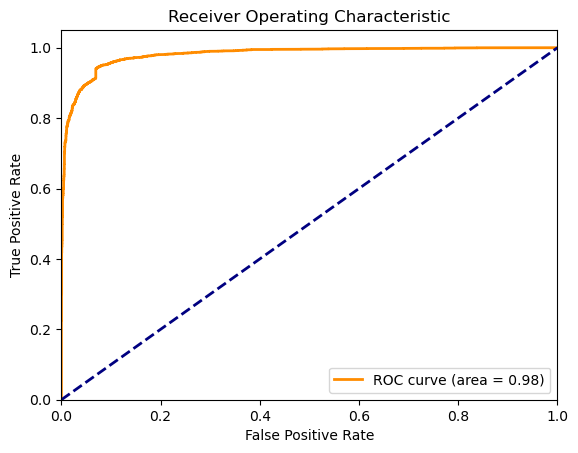

In [18]:
# Calculate the probabilities using the Naive Bayes classifier
y_score = NB.predict_proba(x_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [19]:
# Create and train the LinearSVC
SVM = LinearSVC(dual=False)
SVM.fit(x_train, y_train)

# Make predictions on the test set
y_pred = SVM.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision,recall,F1 Score for fake news
precision = precision_score(y_test, y_pred, average='binary', pos_label=1)
recall = recall_score(y_test, y_pred, average='binary', pos_label=1)
f1 = f1_score(y_test, y_pred, average='binary', pos_label=1)

# Calculate precision,recall,F1 Score for True news
precision1 = precision_score(y_test, y_pred, average='binary', pos_label=0)
recall1 = recall_score(y_test, y_pred, average='binary', pos_label=0)
f11 = f1_score(y_test, y_pred, average='binary', pos_label=0)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (Fake News)', 'Recall (Fake News)', 'F1 Score (Fake News)',
               'Precision (True News)', 'Recall (True News)', 'F1 Score (True News)'],
    'Value': [accuracy, precision, recall, f1, precision1, recall1, f11]
})

# Set the display options for pandas
pd.set_option('display.float_format', '{:.8f}'.format)

# Define a function to make the headings bold, underlined and left-aligned
def pretty_print(df):
    return display(HTML(df.to_html().replace('<th>', '<th style=\"font-weight: bold; text-decoration: underline; text-align: left;\">').replace('<td>', '<td style=\"text-align: left;\">')))

# Print the results in a tabular format
pretty_print(results_df)


,Metric,Value
0,Accuracy,0.99320713
1,Precision (Fake News),0.99404888
2,Recall (Fake News),0.99299363
3,F1 Score (Fake News),0.99352098
4,Precision (True News),0.99228070
5,Recall (True News),0.99344262
6,F1 Score (True News),0.99286132


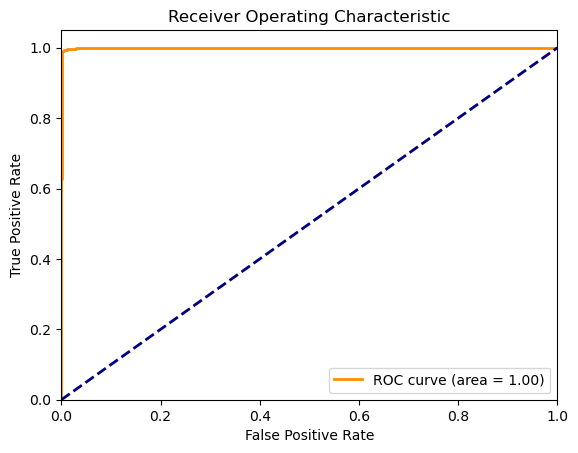

In [20]:
# Calculate the probabilities using the SVM classifier
y_score = SVM.decision_function(x_test)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [21]:
# Function to predict if a news article is fake or not
def predict_fake_news_LRM(news_article):
    # Preprocess the text
    news_article = news_article.lower().replace('\W', ' ')

    # Vectorize the text
    news_article_vectorized = vectorizer.transform([news_article])

    # Make a prediction
    prediction = LRM.predict(news_article_vectorized)

    # Return the prediction
    return "Fake" if prediction[0] == 1 else "Real"

In [22]:
# Function to predict if a news article is fake or not
def predict_fake_news_DTC(news_article):
    # Preprocess the text
    news_article = news_article.lower().replace('\W', ' ')

    # Vectorize the text
    news_article_vectorized = vectorizer.transform([news_article])

    # Make a prediction
    prediction = DTC.predict(news_article_vectorized)

    # Return the prediction
    return "Fake" if prediction[0] == 1 else "Real"

In [23]:
# Function to predict if a news article is fake or not
def predict_fake_news_RFC(news_article):
    # Preprocess the text
    news_article = news_article.lower().replace('\W', ' ')

    # Vectorize the text
    news_article_vectorized = vectorizer.transform([news_article])

    # Make a prediction
    prediction = RFC.predict(news_article_vectorized)

    # Return the prediction
    return "Fake" if prediction[0] == 1 else "Real"

In [24]:
# Function to predict if a news article is fake or not
def predict_fake_news_SVM(news_article):
    # Preprocess the text
    news_article = news_article.lower().replace('\W', ' ')

    # Vectorize the text
    news_article_vectorized = vectorizer.transform([news_article])

    # Make a prediction
    prediction = SVM.predict(news_article_vectorized)

    # Return the prediction
    return "Fake" if prediction[0] == 1 else "Real"

In [25]:
# Function to predict if a news article is fake or not
def predict_fake_news_NBC(news_article):
    # Preprocess the text
    news_article = news_article.lower().replace('\W', ' ')

    # Vectorize the text
    news_article_vectorized = vectorizer.transform([news_article])

    # Make a prediction
    prediction = NB.predict(news_article_vectorized)

    # Return the prediction
    return "Fake" if prediction[0] == 1 else "Real"

1>**Fake news:** Vic Bishop Waking TimesOur reality is carefully constructed by powerful corporate, political and special interest sources in order to covertly sway public opinion. Blatant lies are often televised regarding terrorism, food, war, health, etc. They are fashioned to sway public opinion and condition viewers to accept what have become destructive societal norms.The practice of manipulating and controlling public opinion with distorted media messages has become so common that there is a whole industry formed around this. The entire role of this brainwashing industry is to figure out how to spin information to journalists, similar to the lobbying of government. It is never really clear just how much truth the journalists receive because the news industry has become complacent. The messages that it presents are shaped by corporate powers who often spend millions on advertising with the six conglomerates that own 90% of the media:General Electric (GE), News-Corp, Disney, Viacom, Time Warner, and CBS. Yet, these corporations function under many different brands, such as FOX, ABC, CNN, Comcast, Wall Street Journal, etc, giving people the perception of choice   As Tavistock s researchers showed, it was important that the victims of mass brainwashing not be aware that their environment was being controlled; there should thus be a vast number of sources for information, whose messages could be varied slightly, so as to mask the sense of external control. ~ Specialist of mass brainwashing, L. WolfeNew Brainwashing Tactic Called AstroturfWith alternative media on the rise, the propaganda machine continues to expand. Below is a video of Sharyl Attkisson, investigative reporter with CBS, during which she explains how  astroturf,  or fake grassroots movements, are used to spin information not only to influence journalists but to sway public opinion. Astroturf is a perversion of grassroots. Astroturf is when political, corporate or other special interests disguise themselves and publish blogs, start facebook and twitter accounts, publish ads, letters to the editor, or simply post comments online, to try to fool you into thinking an independent or grassroots movement is speaking. ~ Sharyl Attkisson, Investigative ReporterHow do you separate fact from fiction? Sharyl Attkisson finishes her talk with some insights on how to identify signs of propaganda and astroturfing  These methods are used to give people the impression that there is widespread support for an agenda, when, in reality, one may not exist. Astroturf tactics are also used to discredit or criticize those that disagree with certain agendas, using stereotypical names such as conspiracy theorist or quack. When in fact when someone dares to reveal the truth or questions the  official  story, it should spark a deeper curiosity and encourage further scrutiny of the information.This article (Journalist Reveals Tactics Brainwashing Industry Uses to Manipulate the Public) was originally created and published by Waking Times and is published here under a Creative Commons license with attribution to Vic Bishop and WakingTimes.com. It may be re-posted freely with proper attribution, author bio, and this copyright statement.

2>**Real News:** SAO PAULO (Reuters) - Cesar Mata Pires, the owner and co-founder of Brazilian engineering conglomerate OAS SA, one of the largest companies involved in Brazil s corruption scandal, died on Tuesday. He was 68. Mata Pires died of a heart attack while taking a morning walk in an upscale district of S o Paulo, where OAS is based, a person with direct knowledge of the matter said. Efforts to contact his family were unsuccessful. OAS declined to comment. The son of a wealthy cattle rancher in the northeastern state of Bahia, Mata Pires  links to politicians were central to the expansion of OAS, which became Brazil s No. 4 builder earlier this decade, people familiar with his career told Reuters last year. His big break came when he befriended Antonio Carlos Magalh es, a popular politician who was Bahia governor several times, and eventually married his daughter Tereza. Brazilians joked that OAS stood for  Obras Arranjadas pelo Sogro  - or  Work Arranged by the Father-In-Law.   After years of steady growth triggered by a flurry of massive government contracts, OAS was ensnared in Operation Car Wash which unearthed an illegal contracting ring between state firms and builders. The ensuing scandal helped topple former Brazilian President Dilma Rousseff last year. Trained as an engineer, Mata Pires founded OAS with two colleagues in 1976 to do sub-contracting work for larger rival Odebrecht SA - the biggest of the builders involved in the probe.  Before the scandal, Forbes magazine estimated Mata Pires  fortune at $1.6 billion. He dropped off the magazine s billionaire list in 2015, months after OAS sought bankruptcy protection after the Car Wash scandal. While Mata Pires was never accused of wrongdoing in the investigations, creditors demanded he and his family stay away from the builder s day-to-day operations, people directly involved in the negotiations told Reuters at the time. He is survived by his wife and his two sons.

**EXTRACTED FROM DATASET**

In [27]:
# Test the function
news_article = "Vic Bishop Waking Times Our reality is carefully constructed by powerful corporate, political and special interest sources in order to covertly sway public opinion. Blatant lies are often televised regarding terrorism, food, war, health, etc. They are fashioned to sway public opinion and condition viewers to accept what have become destructive societal norms."
print(predict_fake_news_LRM(news_article))
print(predict_fake_news_DTC(news_article))
print(predict_fake_news_RFC(news_article))
print(predict_fake_news_SVM(news_article))
print(predict_fake_news_NBC(news_article))
# Test the function
news_article = "SAO PAULO (Reuters) - Cesar Mata Pires, the owner and co-founder of Brazilian engineering conglomerate OAS SA, one of the largest companies involved in Brazil s corruption scandal, died on Tuesday. He was 68. Mata Pires died of a heart attack while taking a morning walk in an upscale district of S o Paulo, where OAS is based, a person with direct knowledge of the matter said. Efforts to contact his family were unsuccessful."
print(predict_fake_news_LRM(news_article))
print(predict_fake_news_DTC(news_article))
print(predict_fake_news_RFC(news_article))
print(predict_fake_news_SVM(news_article))
print(predict_fake_news_NBC(news_article))


Fake
Fake
Fake
Fake
Fake
Real
Real
Real
Real
Real


**Hence we can see that using Logistic Regression Model, Decision Tree Classifier, Random Forest Classifier, Support Vector Machine, Naive Bayes Classifier we have predicted the piece of news artical and each model has predicted it as a fake so we can consider it that all the models have performed well.**

**Decision Tree Classifier has the highest accuracy of 99.66%, Followed by Support Vector Machine which has accuracy of 99.32%,  Random Forest Classifier has accuracy of 98.70%, Logistic Regression Model has accuracy of 98.45%, Naive Bayes Classifier has accuracy of 93.54%**